# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(suppress=True)

import seaborn as sn

from sklearn.preprocessing import LabelBinarizer

from tensorflow import keras
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import History
from keras.utils.vis_utils import plot_model

from random import randint
%matplotlib inline

# Loading The Dataset

In [2]:
train = pd.read_csv('mnist-in-csv/mnist_train.csv')
test = pd.read_csv('mnist-in-csv/mnist_test.csv')

# Splitting Labels and Features

In [3]:
x_train = train.drop(['label'], axis=1)
y_train = train.label

x_test = test.drop(['label'], axis=1)
y_test = test.label
y_train.values

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

# Encoding Labels

In [4]:
encoder = LabelBinarizer().fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_encoded, y_test_encoded

(array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]]),
 array([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

# Exploring the Dataset

18532


7

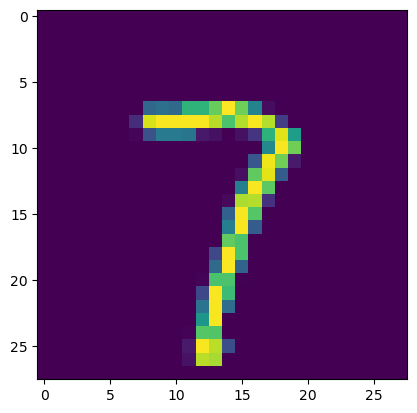

In [5]:
index = randint(0, y_train.shape[0])
print(index)
plt.imshow(np.array(x_train.loc[index]).reshape((28, 28)))
y_train.iloc[index]

# Scaling the Dataset

In [6]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# Creating the Model

In [7]:
model = Sequential()

model.add(Conv1D(40, 3, activation='relu', input_shape=(784, 1)))
model.add(MaxPool1D(pool_size=5))

model.add(Conv1D(30, 3, activation='relu'))
model.add(MaxPool1D(pool_size=4))

model.add(Conv1D(20, 3, activation='relu'))
model.add(MaxPool1D(pool_size=3))

model.add(Conv1D(10, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2))

model.add(Flatten())
model.add(Dense(70, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 782, 40)           160       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 156, 40)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 154, 30)           3630      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 38, 30)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 20)            1820      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 20)           0

# Visualizing the Model

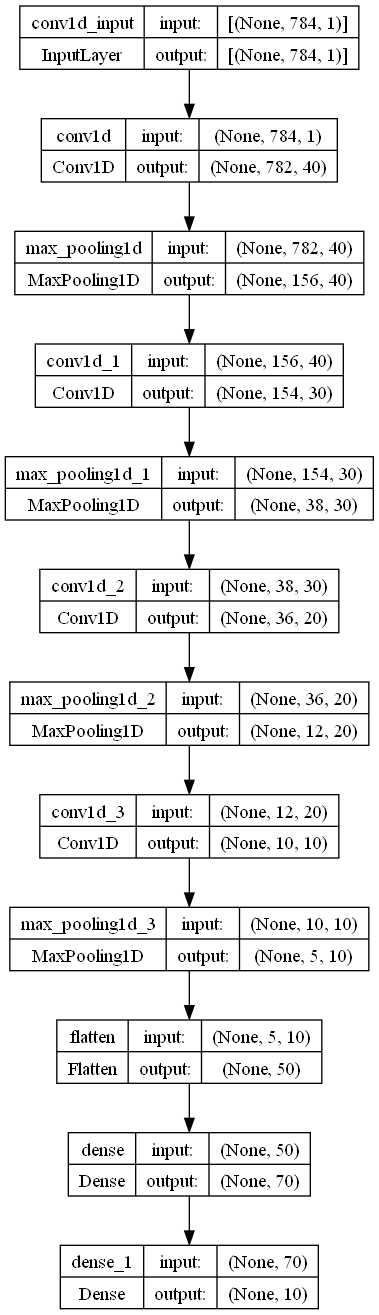

In [8]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Training the Model

In [9]:
# global_history = History()

In [10]:
# epochs = 40

# for _ in range(epochs):
#     local_history = model.fit(
#         x_train_scaled, 
#         y_train_encoded,
#         epochs=1, 
#         validation_data=(
#             x_test_scaled,
#             y_test_encoded
#         )
#     )
#     for key, local_value in local_history.history.items():
#         global_value = global_history.history.get(key, [])
#         global_value.extend(local_value)
#         global_history.history[key] = global_value

 193/1875 [==>...........................] - ETA: 39s - loss: 0.1021 - accuracy: 0.9676

KeyboardInterrupt: 

[0.2009880691766739,
 0.15094967186450958,
 0.11485413461923599,
 0.10887356102466583]

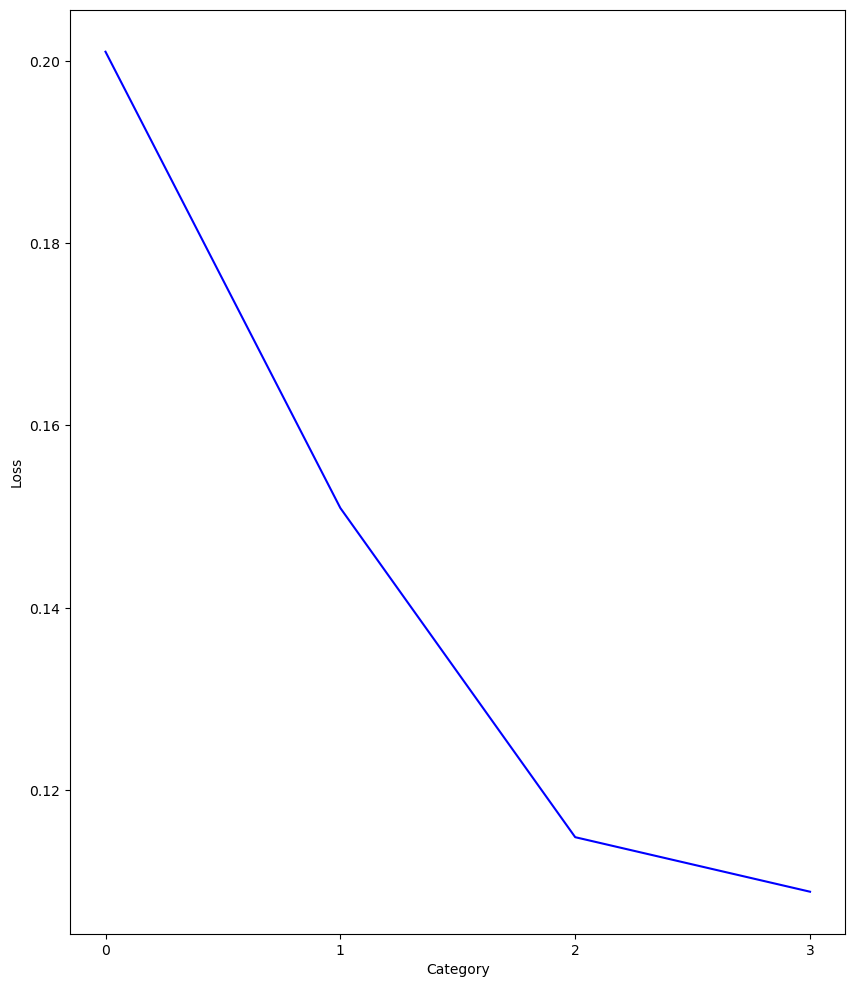

In [11]:
plt.figure(figsize=(10, 12))
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Loss")
plt.plot(global_history.history['val_loss'],color='blue')
global_history.history['val_loss']

[0.9323999881744385,
 0.9509000182151794,
 0.9639000296592712,
 0.9643999934196472]

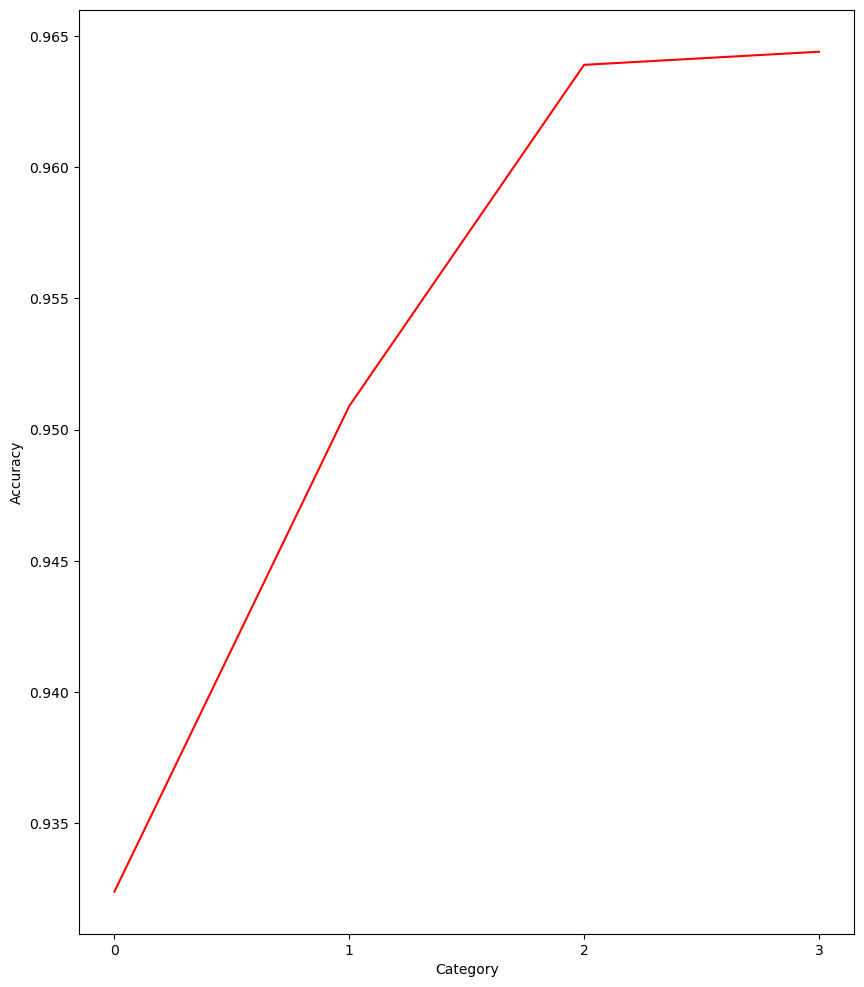

In [29]:
plt.figure(figsize=(10, 12))
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Accuracy")
plt.plot(global_history.history['val_accuracy'],color='red')
global_history.history['val_accuracy']

# Saving the Model

In [12]:
# model.save('out/model')

INFO:tensorflow:Assets written to: out/model\assets


INFO:tensorflow:Assets written to: out/model\assets


# Verifying Model

## Loading Model

In [13]:
model = keras.models.load_model('out/model')

## Testing Model on Random Samples of the Testing Dataset

1/1 [==============================] - 1s 1s/step
Index: 587
Actual: 6
Predicted: 6
Confidence: 0.9868529438972473


587

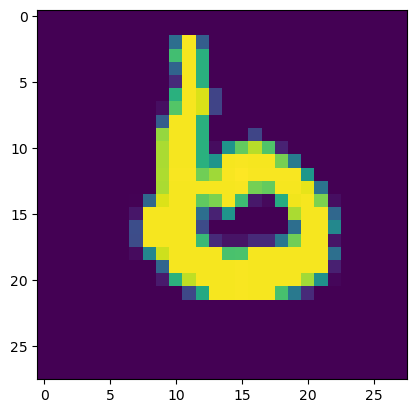

In [14]:
def plot_random_sample(features, index=None):
    from random import randint
    if index is None:
        index = randint(0, features.shape[0])
    plt.imshow(np.array(features.iloc[index]).reshape((28, 28)))
    return index

def plot_and_eval_random_sample(features, labels, index=None):
    index = plot_random_sample(features, index)
    result = model.predict(features.iloc[[index]])[0]
    
    print(f"Index: {index}")
    print(f"Actual: {np.argmax(labels[index])}")
    print(f"Predicted: {np.argmax(result)}")
    print(f"Confidence: {result.max()}")
    return index

plot_and_eval_random_sample(x_test_scaled, y_test_encoded)

## Class Based Evaluation of Model

In [15]:
class_based_dataset = [
    (
        test.loc[test['label'] == i].drop(['label'], axis=1),
        encoder.transform(test.loc[test['label'] == i].label)
    ) 
    for i in range(10)
]
results = [
    model.evaluate(x, y)
    for x, y in class_based_dataset
]
losses = [
    result[0]
    for result in results
]
accuracies = [
    result[1]
    for result in results
]
losses, accuracies

32/32 [==============================] - 0s 9ms/step - loss: 52.9265 - accuracy: 0.8850


([19.898019790649414,
  8.175003051757812,
  29.591453552246094,
  51.536285400390625,
  5.4770097732543945,
  38.911136627197266,
  18.152421951293945,
  8.79196834564209,
  46.42030715942383,
  52.926517486572266],
 [0.9561224579811096,
  0.9814978241920471,
  0.940891444683075,
  0.8900989890098572,
  0.9857434034347534,
  0.9204035997390747,
  0.9655532240867615,
  0.9776264429092407,
  0.8973305821418762,
  0.8850346803665161])

## Plotting Loss

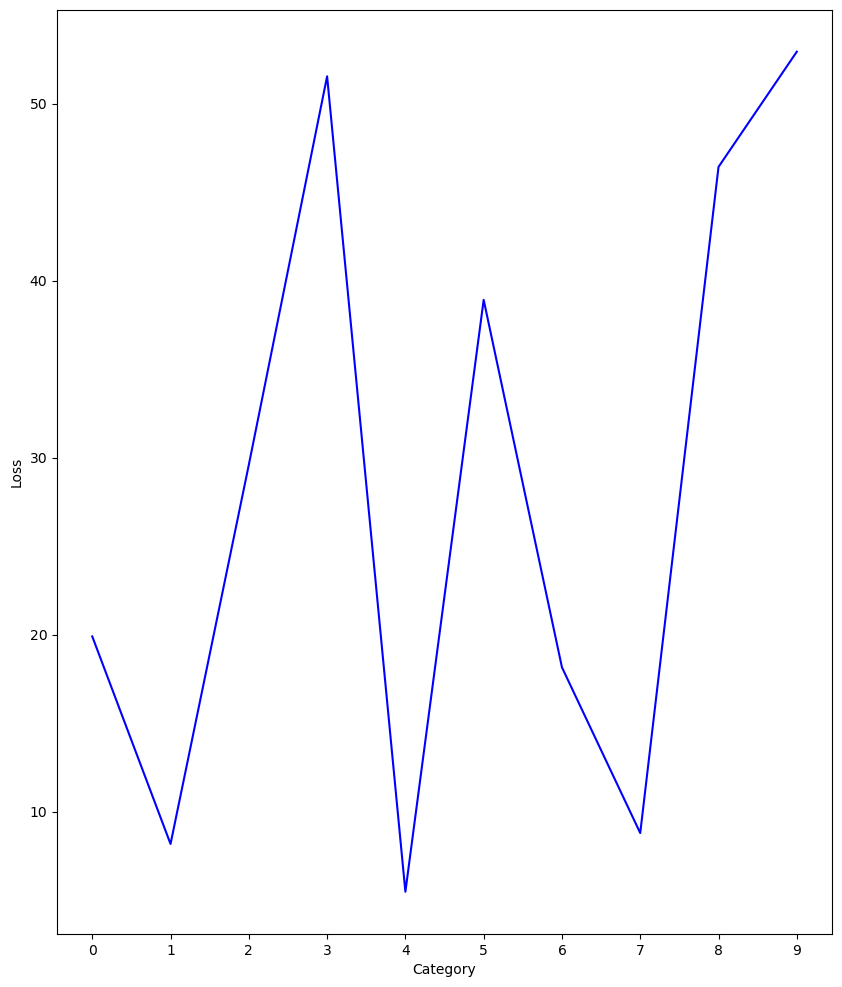

In [16]:
plt.figure(figsize=(10, 12))
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Loss")
plt.plot(losses,color='blue')

## Plotting Accuracies

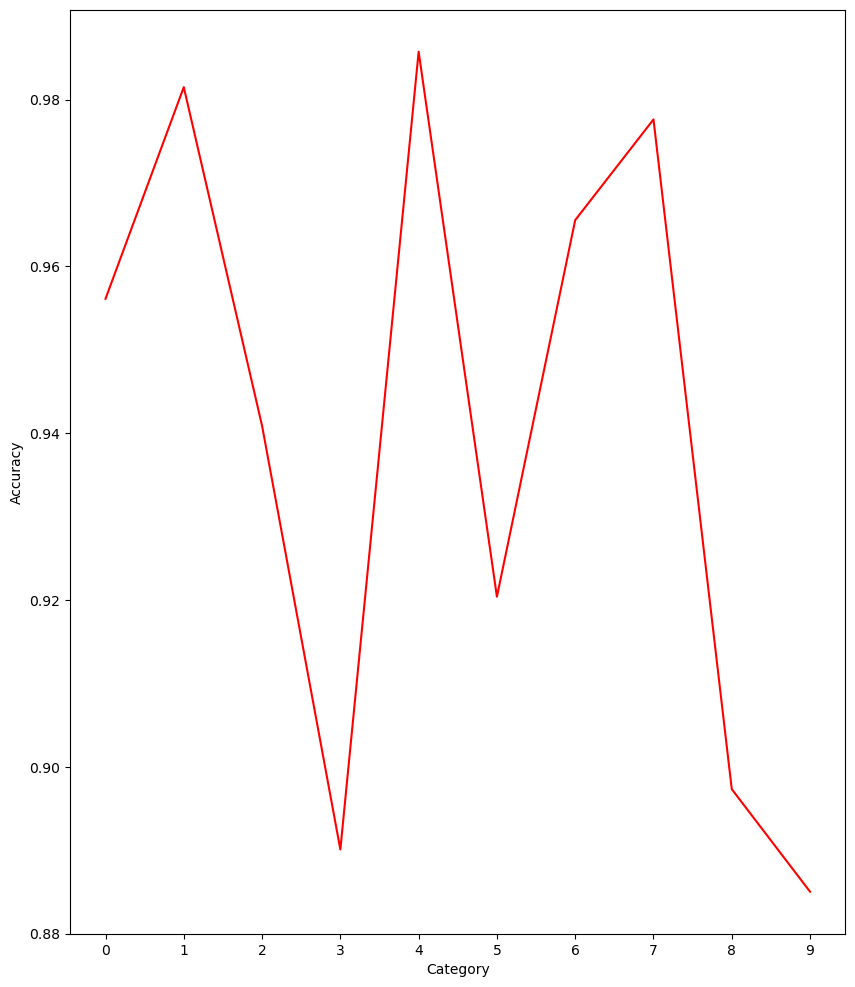

In [17]:
plt.figure(figsize=(10, 12))
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Accuracy")
plt.plot(accuracies, color='red')

## Calculating Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
def generate_confusion_matrix(model, features, encoded_labels):
    prediction = np.argmax(model.predict(features), axis=1)
    actual = np.argmax(encoded_labels, axis=1)
    return confusion_matrix(actual, prediction)

result = generate_confusion_matrix(
    model,
    x_test_scaled,
    y_test_encoded
)
result

313/313 [==============================] - 3s 10ms/step


array([[ 964,    0,    1,    0,    4,    2,    5,    2,    2,    0],
       [   1, 1122,    4,    3,    0,    0,    2,    0,    3,    0],
       [   4,    3,  997,    8,    0,    3,    2,   13,    1,    1],
       [   0,    1,    8,  959,    0,   23,    0,    9,    0,   10],
       [   1,    0,    4,    0,  949,    0,    2,    4,    0,   22],
       [   1,    3,    0,   19,    0,  860,    4,    1,    1,    3],
       [   4,    4,    3,    0,    7,    4,  935,    0,    1,    0],
       [   1,    3,    4,    3,    0,    2,    0, 1007,    0,    8],
       [   3,    0,    9,   12,    3,    6,    8,    9,  918,    6],
       [   1,    7,    0,    6,    9,    8,    0,   18,    5,  955]],
      dtype=int64)

## Plotting Confusion Matrix

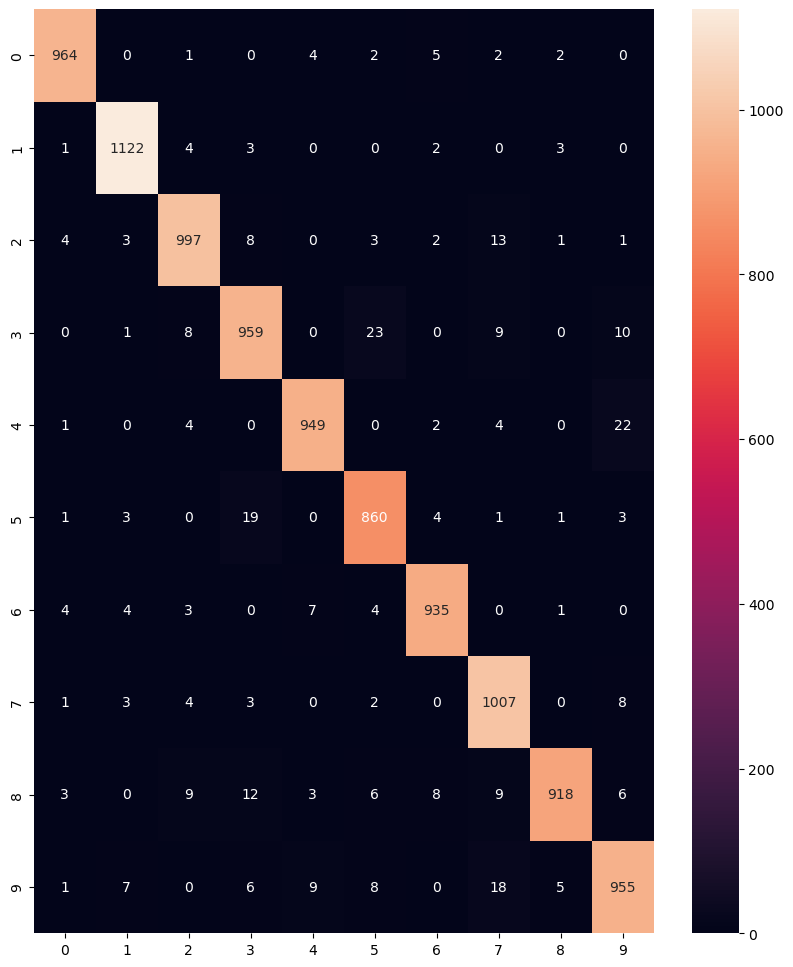

In [19]:
df_cm = pd.DataFrame(result, range(10), range(10))
plt.figure(figsize=(10, 12))
sn.heatmap(df_cm, annot=True, fmt='g')

plt.show()

## Noisy Dataset

1/1 [==============================] - 0s 31ms/step
Index: 8790
Actual: 4
Predicted: 4
Confidence: 0.6690016984939575


8790

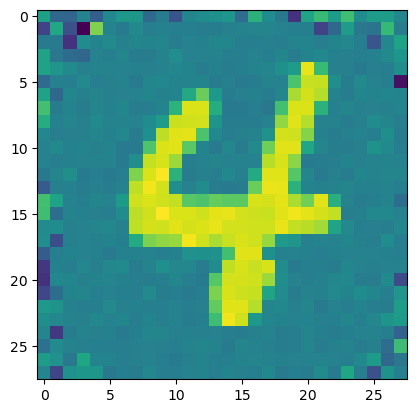

In [20]:
scale = 0.1
noise = np.random.normal(scale=scale, size=x_test.shape)
x_test_noisy = x_test + noise
max_noisy_value = x_test_noisy.max()
min_noisy_value = x_test_noisy.min()
x_test_noisy_scaled = - min_noisy_value + (x_test_noisy / max_noisy_value)
plot_and_eval_random_sample(x_test_noisy_scaled, y_test_encoded)

## Rotated Images

### Generating Random Angles

In [21]:
angles = [
    randint(0, 360)
    for _ in range(x_test.shape[0])
]

### Rotating Images

In [22]:
from skimage.transform import rotate

x_test_rotated = pd.DataFrame(
    [
        rotate(
            datapoint.reshape((28, 28)),
            angle,
            preserve_range=True
        ).reshape((784,))
        for datapoint, angle in zip(x_test.values, angles)
    ]
)
max_value = x_test_rotated.max().max()
x_test_rotated_scaled = x_test_rotated / max_value
x_test_rotated_scaled['label'] = test.label

### Evaluation of Model

1/1 [==============================] - 0s 27ms/step
Index: 9150
Actual: 8
Predicted: 8
Confidence: 0.5638171434402466


9150

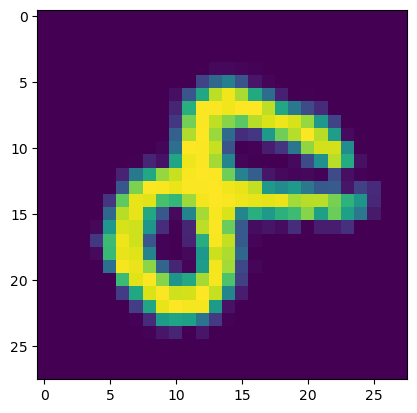

In [23]:
rotated_features = x_test_rotated_scaled.drop(
    ['label'], axis=1
)
rotated_labels = y_test_encoded
plot_and_eval_random_sample(
    rotated_features,
    rotated_labels
)

### Class Based Evaluation of Model With Rotated Images

In [24]:
x_test_rotated_class_based = [
    (
        x_test_rotated_scaled.loc[x_test_rotated_scaled['label'] == i].drop(['label'], axis=1),
        encoder.transform(x_test_rotated_scaled.loc[x_test_rotated_scaled['label'] == i].label)
    ) 
    for i in range(10)
]

rotated_results = [model.evaluate(x, y) for x, y in x_test_rotated_class_based]
rotated_losses = [result[0] for result in results]
rotated_accuracies = [result[1] for result in results]

32/32 [==============================] - 0s 10ms/step - loss: 5.0119 - accuracy: 0.2408


### Plotting Loss

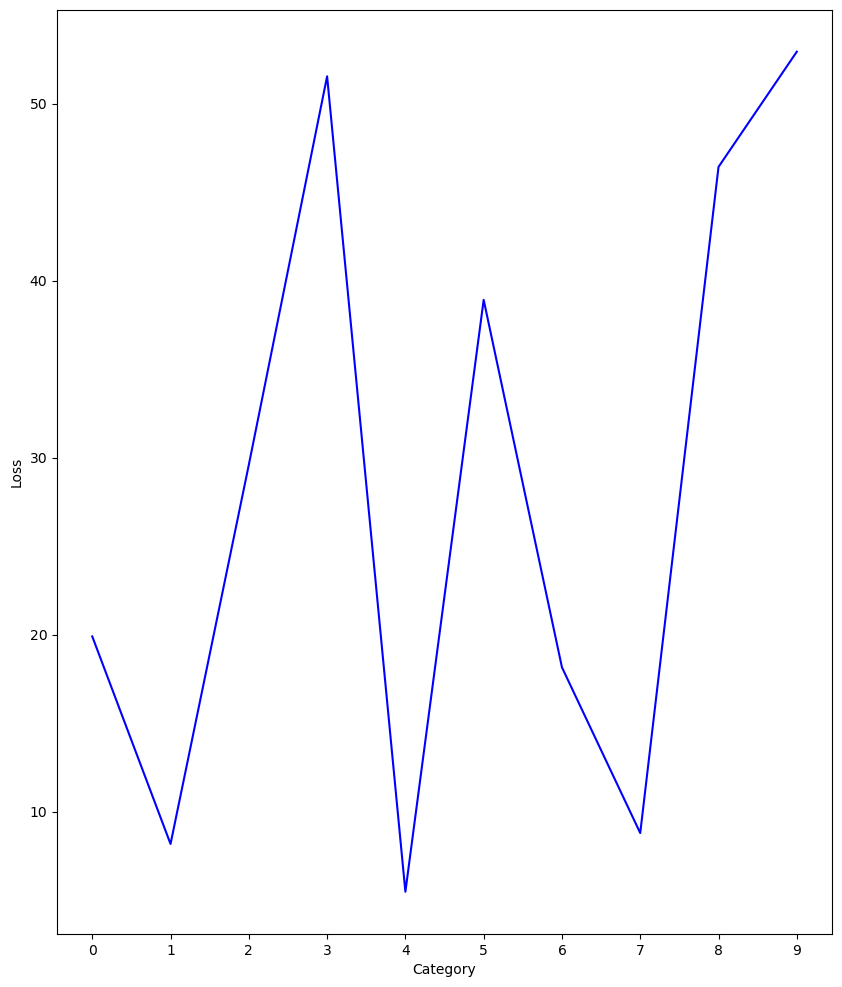

In [25]:
plt.figure(figsize=(10, 12))
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Loss")
plt.plot(rotated_losses,color='blue')

### Plotting Accuracies

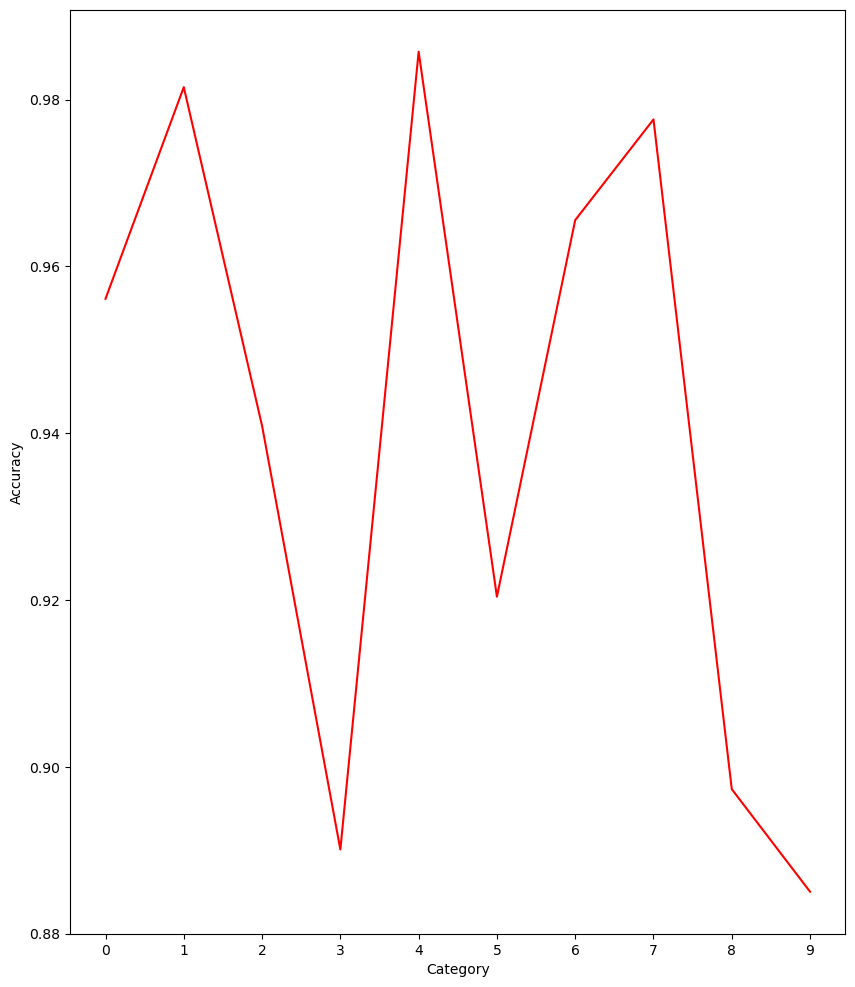

In [26]:
plt.figure(figsize=(10, 12))
plt.xticks(range(10))
plt.xlabel("Category")
plt.ylabel("Accuracy")
plt.plot(rotated_accuracies, color='red')

### Confusion Matrix

313/313 [==============================] - 3s 9ms/step


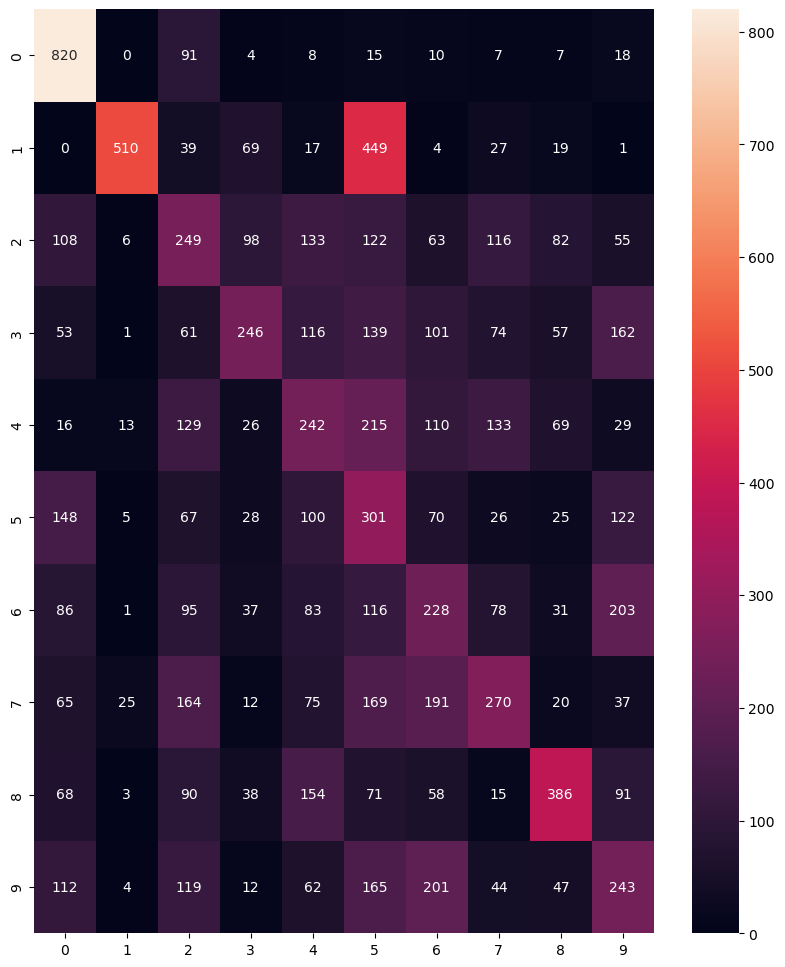

In [27]:
confusion_matrix = generate_confusion_matrix(model, rotated_features, rotated_labels)


df_cm = pd.DataFrame(confusion_matrix, range(10), range(10))
plt.figure(figsize=(10, 12))
sn.heatmap(df_cm, annot=True, fmt='g') # font size

plt.show()